# Machine Learning HW3 Simulation Part (Decision Tree and Pruning)
## Amirmahdi Ansaripour (810198358)

### Part A (Running decision trees):
At first, we have devided the dataset into train and test sets with ratios of 0.3 and 0.7 respectively. After that, a decision tree is applied on each of these sets. The trees are drawn. 

Obviously, when there is no pruning technique used, the tree gets complicated and has a great height (signs of overfitting).


In [1]:
import pandas as pds
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt
import math

In [2]:
df = pds.read_csv('./Diabetes.csv')
labels = df.iloc[:, -1]
features = df.iloc[:, :-1]

In [3]:
columns = [col for col in features.columns]
classes = ['0', '1']

In [10]:
def handle_decision_tree(x_train, x_test, y_train, y_test, maxDepth, title_):
    decision_tree = tree.DecisionTreeClassifier(max_depth = maxDepth)
    plt.figure(0)
    decision_tree.fit(x_train, y_train)
    tree.plot_tree(decision_tree, feature_names = columns, class_names = classes)
    plt.title(title_ + '  (train)')
    plt.show()
    train_accuracy = decision_tree.score(x_train, y_train)
    test_accuracy = decision_tree.score(x_test, y_test)
    plt.figure(1)
    decision_tree.fit(x_test, y_test)
    tree.plot_tree(decision_tree, feature_names = columns, class_names = classes)
    plt.title(title_ + '  (test)')
    plt.show()
    return train_accuracy, test_accuracy

In [8]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, 
                                stratify = labels, random_state = 0, test_size = 0.3)

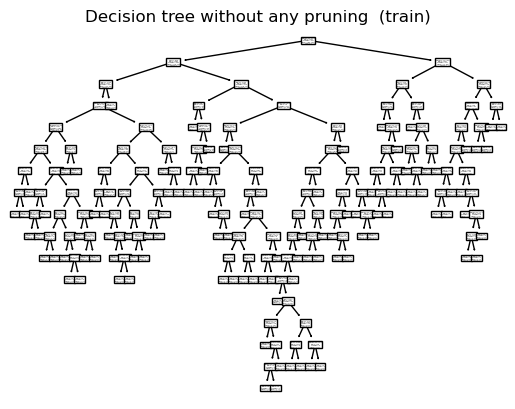

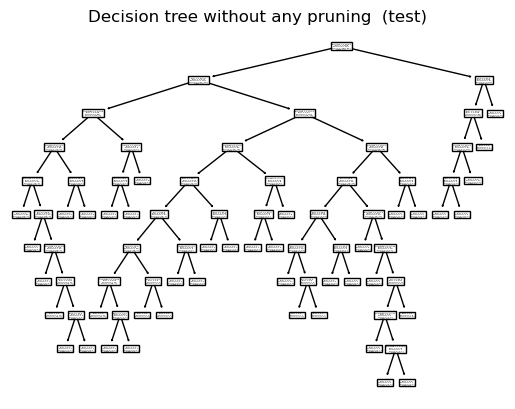

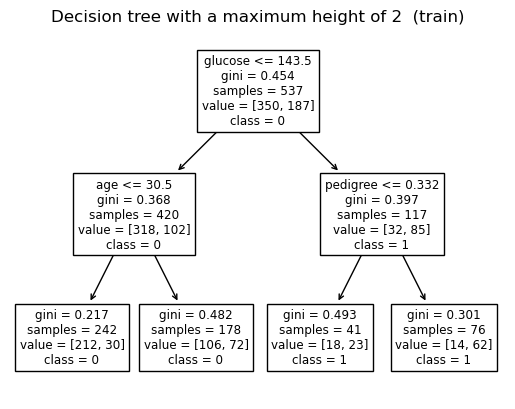

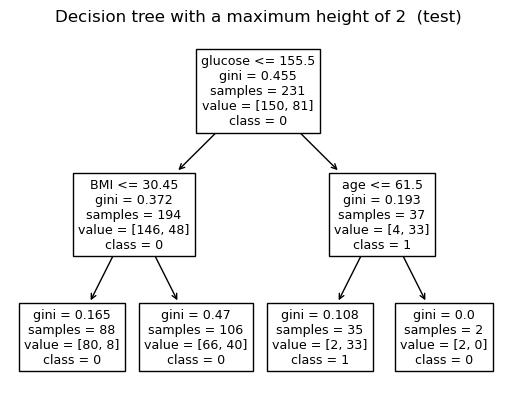

In [11]:
train_accuracy_no_pruning, test_accuracy_no_pruning = handle_decision_tree(x_train, x_test, y_train, y_test, 1000, 'Decision tree without any pruning')
train_accuracy_pruned, test_accuracy_pruned = handle_decision_tree(x_train, x_test, y_train, y_test, 2, 'Decision tree with a maximum height of 2')

### Part B (Pre-pruning):
In order to keep decision trees from getting overfitted, we can put some limitations. These limitations will not allow the tree to become too complex, thus making it interpretable. When these limitations are defined before the beginnning of the algorithm, they are called pre-pruning. 

For example, if we limit the tree's height or do not let the tree's leaves to contain few samples, we have used pre-pruning.

In [13]:
print('Train dataset accuracy without pruning: ', round(train_accuracy_no_pruning, 3)) 
print('Test dataset accuracy without pruning: ', round(test_accuracy_no_pruning, 3))

print('Train dataset accuracy with pre-pruning: ', round(train_accuracy_pruned, 3))
print('Test dataset accuracy with pre-pruning: ', round(test_accuracy_pruned, 3))

Train dataset accuracy without pruning:  1.0
Test dataset accuracy without pruning:  0.701
Train dataset accuracy with pre-pruning:  0.75
Test dataset accuracy with pre-pruning:  0.749


### Part D (Comparing results):
Obviously, when we allow the tree to get arbitrarily complicated, its accuracy on train set will be 1 (over-fitting). However, such a model lacks accuracy on test samples. 

When pruning methods are used, although the model's accuracy on train set decreases, its test accuracy increases remarkably.  